#Data Understanding

##Import Library

In [1]:
!pip install yfinance
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

##Load Dataset

In [2]:
df = yf.download("ADRO.JK", start="2020-01-01", end="2025-01-01")

# Ubah multi-level columns jadi single-level
df.columns = df.columns.get_level_values(0)


# Lihat hasilnya
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,504.317871,524.558053,502.631189,524.558053,76612000
2020-01-03,516.834778,518.598719,502.723248,515.070837,117795600
2020-01-06,516.834778,534.474190,511.542954,513.306895,61423200
2020-01-07,543.293884,543.293884,515.070825,522.126590,74336500
2020-01-08,530.946350,541.529998,530.946350,539.766057,55121100


##EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1211 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1211 non-null   float64
 1   High    1211 non-null   float64
 2   Low     1211 non-null   float64
 3   Open    1211 non-null   float64
 4   Volume  1211 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 56.8 KB


Data Berisi type data numerik

In [4]:
df.describe()

Price,Close,High,Low,Open,Volume
count,1211.000000,1211.000000,1211.000000,1211.000000,1.211000e+03
mean,1100.609613,1119.804648,1083.563543,1101.912415,9.020292e+07
std,584.763769,593.280354,577.015894,585.095993,7.651315e+07
min,227.548431,236.368138,215.200827,227.548416,0.000000e+00
25%,480.139526,490.097762,473.672987,484.013315,4.325485e+07
50%,1243.882812,1266.508158,1224.569491,1243.882822,7.060990e+07
75%,1480.981262,1498.126749,1454.704788,1473.816567,1.087420e+08
max,2644.297363,2759.266741,2644.297363,2644.297363,1.047877e+09


Terlihat data volume memiliki nilai minimum 0 yang seharusnya tidak ada.

###Drop Missing Value

In [5]:
volume = (df.Volume == 0).sum()
print(volume)

1


In [6]:
df.loc[(df['Volume']==0)]

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-03-16,292.81424,292.81424,292.81424,292.81424,0


In [7]:
# Drop baris dengan nilai 'Volume' = 0
df = df.loc[(df[['Volume']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
df.shape

(1210, 5)

Penghapusan data yang bernilai 0

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
count,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03
mean,1101.277212,1120.488111,1084.217055,1102.581091,9.027746e+07
std,584.543690,593.048532,576.805959,584.874823,7.650078e+07
min,227.548431,236.368138,215.200827,227.548416,1.241340e+07
25%,480.493645,490.618863,474.331392,484.014925,4.331902e+07
50%,1243.882812,1267.739266,1225.953707,1243.882827,7.068465e+07
75%,1481.142853,1498.795868,1454.704826,1474.979891,1.087770e+08
max,2644.297363,2759.266741,2644.297363,2644.297363,1.047877e+09


###Mengatasi Outliers

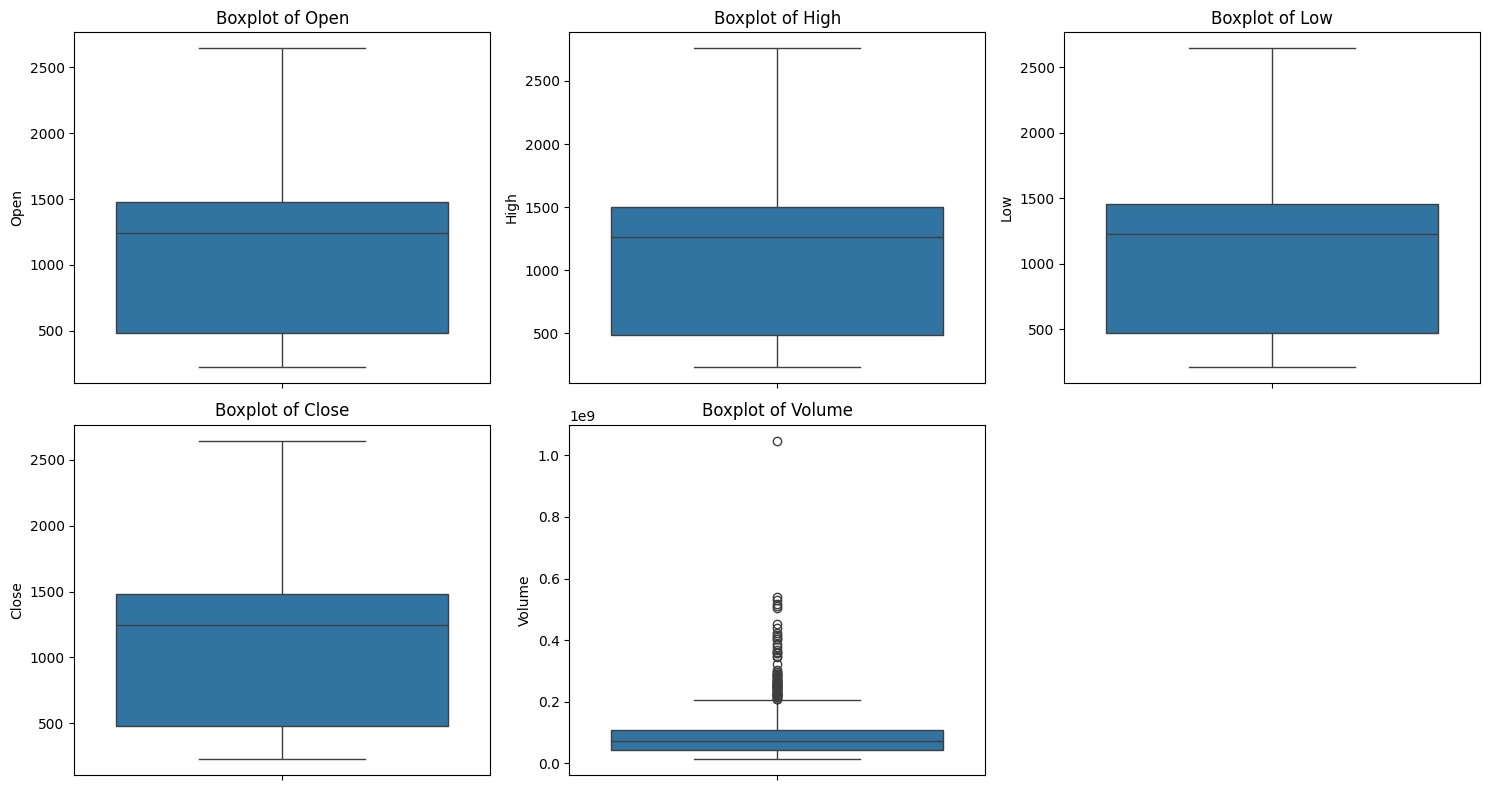

In [9]:
# Buat plot untuk semua kolom numerik
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Hasil Visual BoxPlot memperlihatkan bahwa bagian Volume memiliki Outliers

In [10]:
# Hitung Q1, Q3, dan IQR khusus untuk kolom 'Volume'
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk mendeteksi data yang tidak outlier
filter_outliers = ~((df['Volume'] < (Q1 - 1.5 * IQR)) | (df['Volume'] > (Q3 + 1.5 * IQR)))

# Terapkan filter ke seluruh dataset
df_cleaned = df[filter_outliers]

# Cek ukuran dataset setelah outlier Volume dihapus
print(df_cleaned.shape)


(1133, 5)


Data Volume yang bernilai outlier dihapus agar data bisa di proses lebih lanjut.

###Univariate Analysis

In [11]:
# Kolom numerik
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Kolom kategorikal (termasuk object dan datetime)
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category', 'datetime']).columns

print("Fitur numerik:", list(numerical_cols))
print("Fitur kategorikal:", list(categorical_cols))


Fitur numerik: ['Close', 'High', 'Low', 'Open', 'Volume']
Fitur kategorikal: []


Karena data bertype numerik semua, sehingga tidak ada analisis Category

####Numerical Features

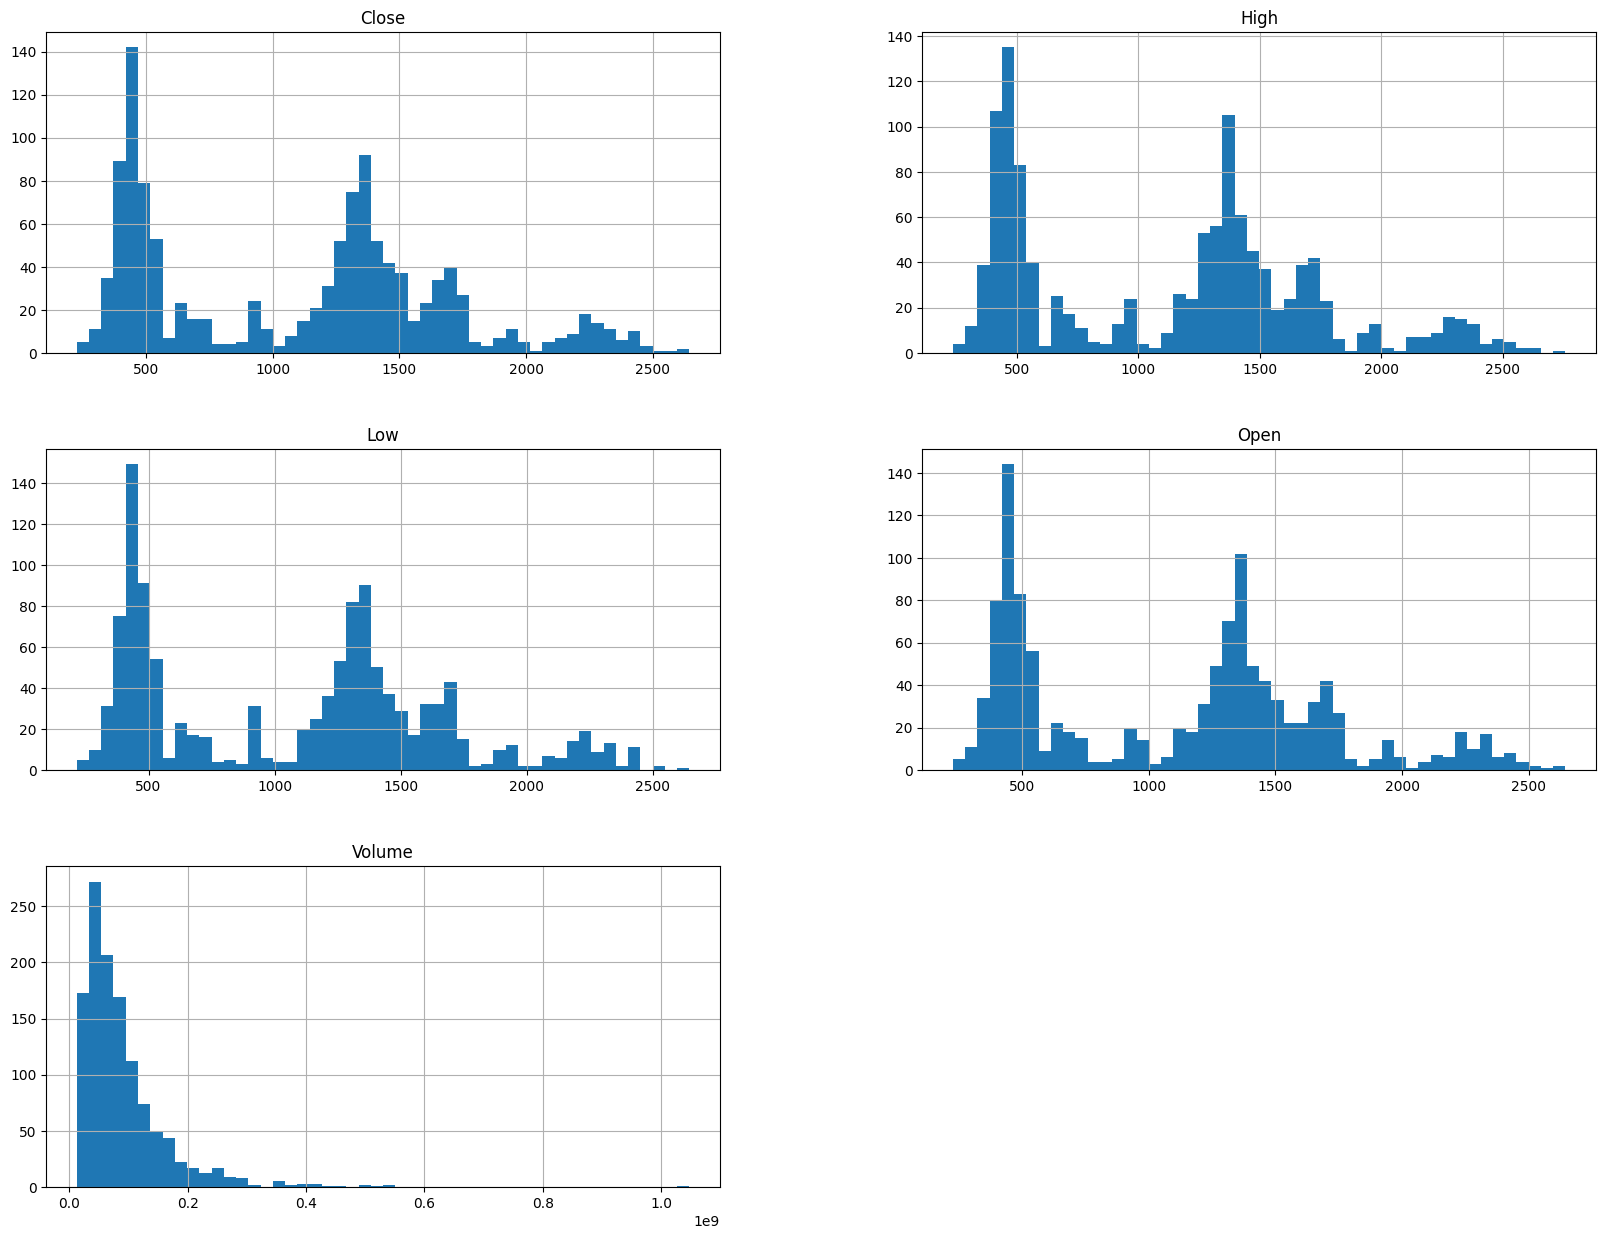

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

###Multivariate Analysis

####Numerical Features

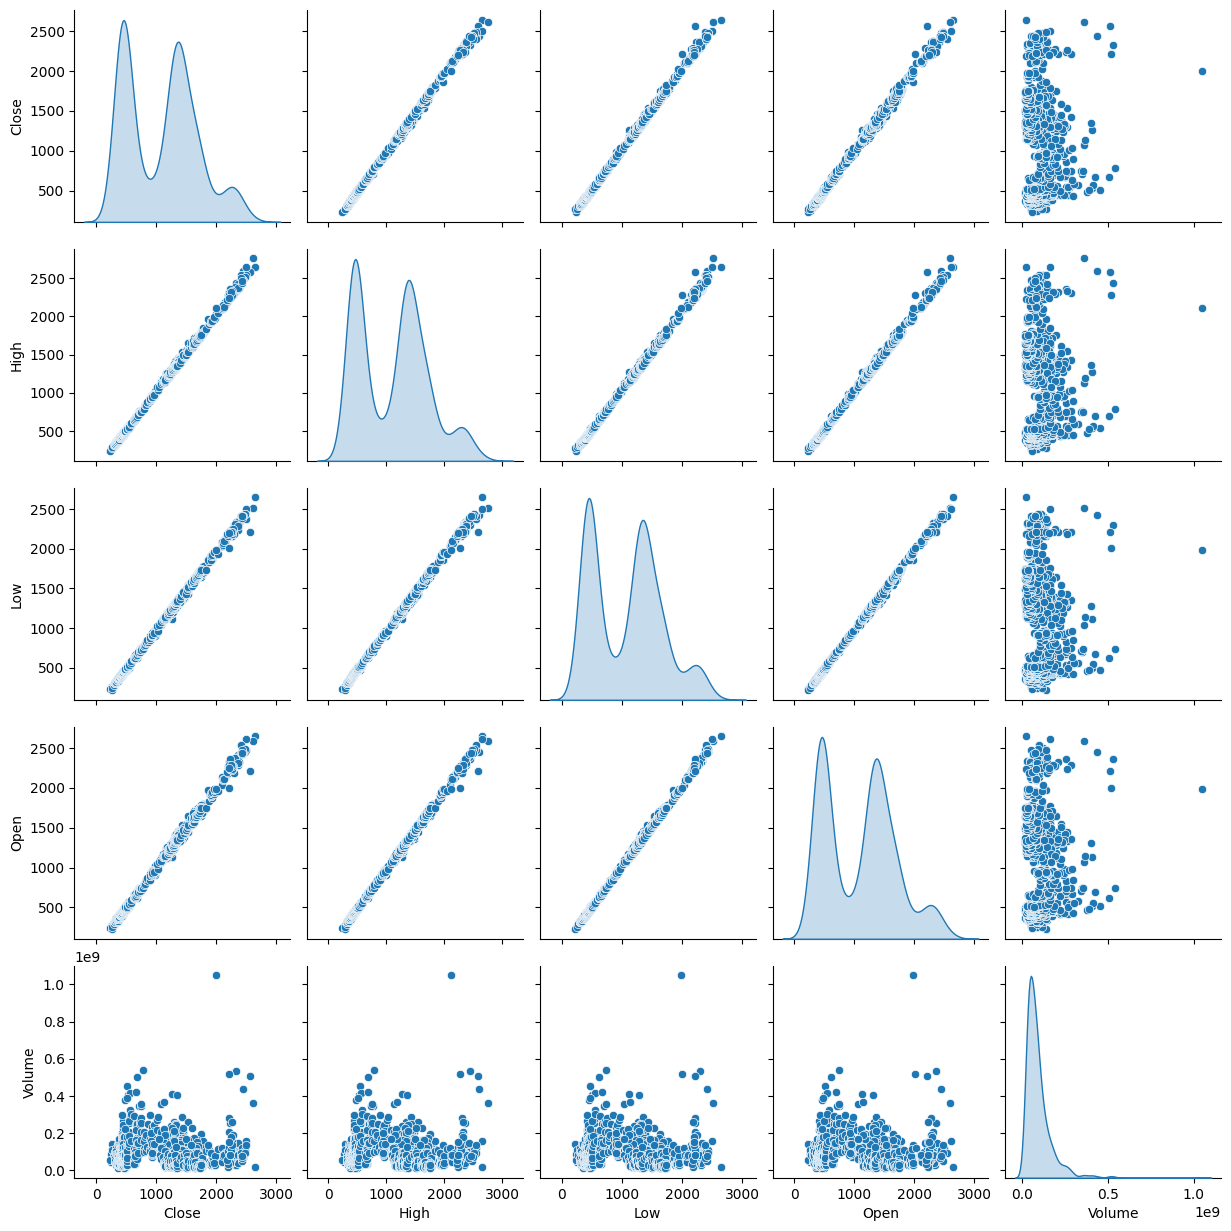

In [13]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

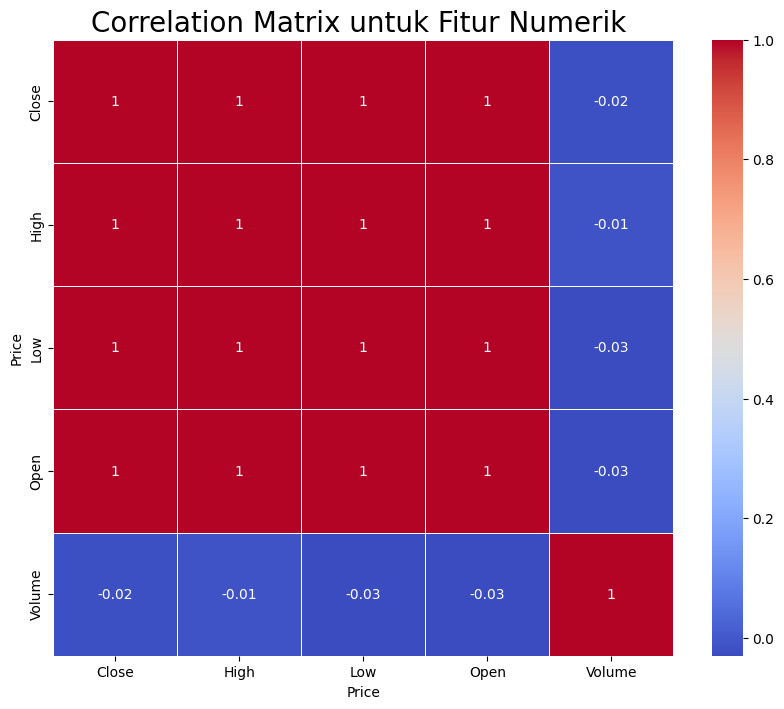

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari hasil Correlation Matrix menunjukkan bahwa Volume jauh dari korelasi, sehingga akan dibuang.

In [15]:
df.drop(['Volume'], inplace=True, axis=1)
df.head()

Price,Close,High,Low,Open
Date,,,,
2020-01-02,504.317871,524.558053,502.631189,524.558053
2020-01-03,516.834778,518.598719,502.723248,515.070837
2020-01-06,516.834778,534.474190,511.542954,513.306895
2020-01-07,543.293884,543.293884,515.070825,522.126590
2020-01-08,530.946350,541.529998,530.946350,539.766057


#Data Preparation

##Reduksi Dimensi Dengan PCA

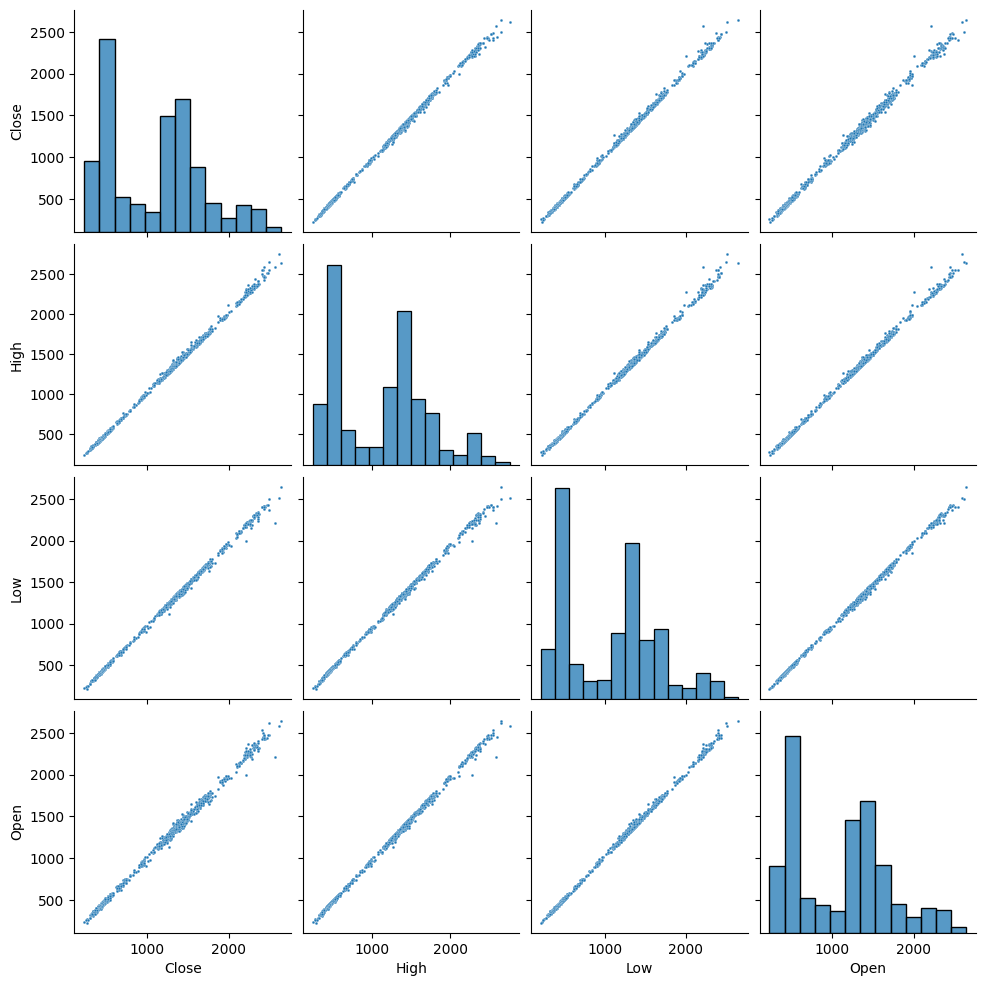

In [16]:
sns.pairplot(df[['Close','High','Low','Open']], plot_kws={"s": 4});

In [17]:
# Ambil fitur
features = ['Close', 'High', 'Low', 'Open']
X = df[features]

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA setelah standardisasi
pca = PCA(n_components=4, random_state=123)
princ_comp = pca.fit_transform(X_scaled)


In [18]:
pca.explained_variance_ratio_.round(5)

array([9.995e-01, 3.100e-04, 1.600e-04, 3.000e-05])

##Train Test Split

In [19]:
# Misalnya df adalah DataFrame kamu
X = df[['Open', 'High', 'Low']]  # fitur (tanpa 'Close')
y = df['Close']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,      # 10% data untuk pengujian
    random_state=123    # supaya split-nya konsisten
)


Split Data: 90:10

Fitur: Open, High, Low
Target: Close

In [20]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1210
Total # of sample in train dataset: 1089
Total # of sample in test dataset: 121


##Standarisasi

In [21]:
numerical_cols = ['Open', 'High', 'Low']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train.loc[:, numerical_cols])
X_train[numerical_cols].head()

Price,Open,High,Low
Date,,,
2024-08-15,1.417839,1.367247,1.417658
2021-02-25,-1.140466,-1.145859,-1.131292
2022-05-25,0.451212,0.414211,0.421754
2022-11-15,0.740070,0.713612,0.729745
2020-11-30,-1.015665,-0.985899,-1.064840


In [22]:
X_train[numerical_cols].describe().round(4)

Price,Open,High,Low
count,1089.0000,1089.0000,1089.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-1.5020,-1.4968,-1.5130
25%,-1.0590,-1.0683,-1.0648
50%,0.2363,0.2472,0.2447
75%,0.6339,0.6267,0.6278
max,2.6107,2.7363,2.6796


#Model Deployment

In [23]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


Analisis Model akan menggunakan tiga jenis model, yaitu:

KNN, RandomForest, Boosting

##KNN

In [24]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##Random Forest

In [25]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##Metode Adaptive Boosting

In [26]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Scaling Pada Data Uji

In [27]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])

#Evaluasi Model

In [28]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.269312,0.223928
RF,0.046941,0.200953
Boosting,5.420234,4.499796


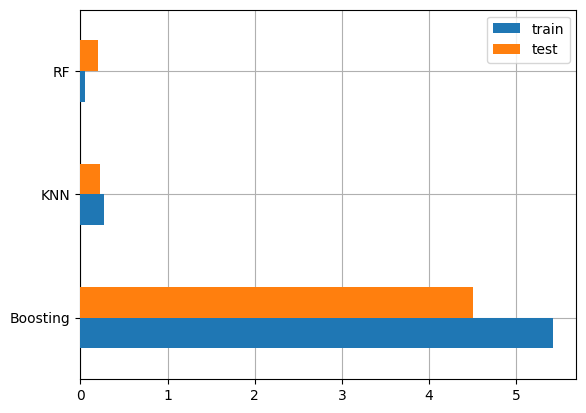

In [29]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Penjelasan:

- Boosting	~5.4	~4.4	Overfitting terlihat → error train & test cukup besar tapi tidak seimbang. Boosting cenderung fit terlalu dalam ke data latih.
- KNN	~0.26	~0.22	Cukup stabil → train dan test error mirip → model tidak overfit atau underfit.
- RF	~0.04	~0.2	Sangat baik → performa sangat bagus di train dan cukup baik di test. Hampir tidak overfit.



##Uji Data

In [30]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
Date,,,,
2023-12-27,1336.786865,1339.1,1337.5,1304.0


Evaluasi Akurasi Prediksi:

Hasil Asli = 1336.7
- KNN	1339.1 	 ->	Cukup dekat
- RandomForest	1337.5	 ->	Paling akurat
- Boosting	1304.0	 ->	Jauh lebih rendah dari aslinya

###Kesimpulan:
- Semua model cukup baik kali ini, terutama Random Forest yang prediksinya hampir identik dengan nilai sebenarnya.

- Model Boosting cenderung underestimate (meremehkan nilai).

- KNN juga cukup akurat, hanya sedikit lebih tinggi.